### **Exercise: Outlier Detection and Removal using Quantile, Standard Deviation, Z-score and IQR Methods**

#### Problem Statement: Outlier Detection and Removal using various methods

* We have been provided with a dataset `customer_profile.csv` containing features such as `Age`, `Income`, and `Spending_Score`. 

* Our task is to identify and remove outliers from these features using multiple data cleaning methods. 

* Addressing these extreme values is a critical step in data preprocessing to ensure that subsequent machine learning models are not negatively impacted.

* We will demonstrate four distinct methods for outlier removal, using each separately on the original dataset to illustrate its specific impact. 

* This approach allows for a direct comparison of how each method handles outliers without the influence of prior data cleaning steps.

**Tasks to be Performed:**

1.  **Quantile Method:** Remove the most extreme outliers using the `[0.001, 0.999]` percentile range on the `Income` feature.
2.  **Standard Deviation Method:** Apply the Standard Deviation method with a threshold of 3 on the `Spending_Score` feature.
3.  **Z-Score Method (Manual):** Calculate Z-scores manually and use a threshold of `|Z| > 3` to remove outliers from the `Age` feature.
4.  **Interquartile Range (IQR) Method:** Use the IQR method to identify and remove outliers from the `Income` feature.
5.  **Visualize and Compare:** Use plots to visualize the data distribution before and after each method to understand the effect of outlier removal.

### Step 1: Load and Explore the Dataset

* First, we will laod the dataset and perform an initial visualization to understand the distribution of the `Age`, `Income`, and `Spending_Score` columns. 

* This will give us a baseline to compare against after we remove the outliers.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('customer_profile.csv')
df.head()

,Age,Income,Spending_Score
0,39.967142,63892.663213,77.987109
1,33.617357,78641.249607,68.492674
2,41.476885,29021.486393,51.192607
3,50.230299,58444.538550,37.061264
4,32.658466,40240.361463,63.964466


In [4]:
# Display the summary statistics
df.describe()

,Age,Income,Spending_Score
count,504.000000,504.000000,504.000000
mean,35.047996,51376.380710,52.588979
std,10.264667,20605.775549,22.554853
min,-10.000000,5000.000000,-7.925108
25%,27.965428,41070.623902,37.887192
50%,35.127971,50438.757218,52.396117
75%,41.367833,59939.196163,65.179705
max,85.000000,300000.000000,250.000000


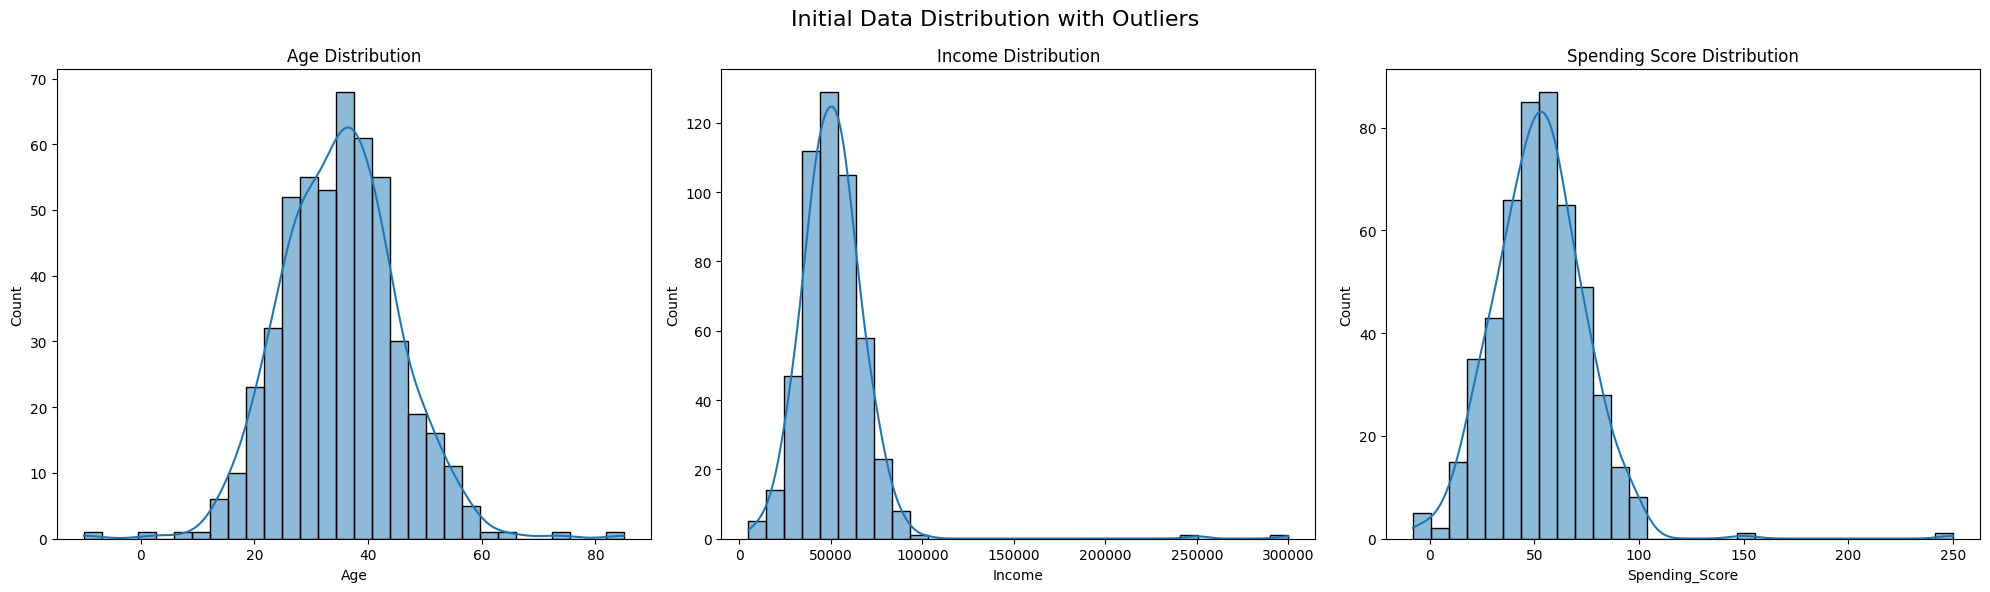

In [5]:
# Visualized the dataset with initial outliers
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Initial Data Distribution with Outliers', fontsize=16)

sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['Income'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Income Distribution')

sns.histplot(df['Spending_Score'], kde=True, bins=30, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

--- 
### Step 2: Outlier Removal using the Quantile Method

* The quantile method is a robust, non-parametric technique. 

* We define a lower and upper percentile threshold and remove any data points that fall outside this range. 

* We will apply this to the `Income` column to remove the most extreme outliers.

In [6]:
# Create a copy of the DataFrame
df_quantile = df.copy()

# Calculate percentile bounds for Income
lower_limit, upper_limit = df_quantile['Income'].quantile([0.001, 0.999])

# Filter to remove outliers
df_quantile_cleaned = df_quantile[
    (df_quantile['Income'] > lower_limit) & (df_quantile['Income'] < upper_limit)
]

print(f"Original DataFrame Shape: {df.shape}")
print(f"Quantile Cleaned DataFrame Shape: {df_quantile_cleaned.shape}")

Original DataFrame Shape: (504, 3)
Quantile Cleaned DataFrame Shape: (502, 3)


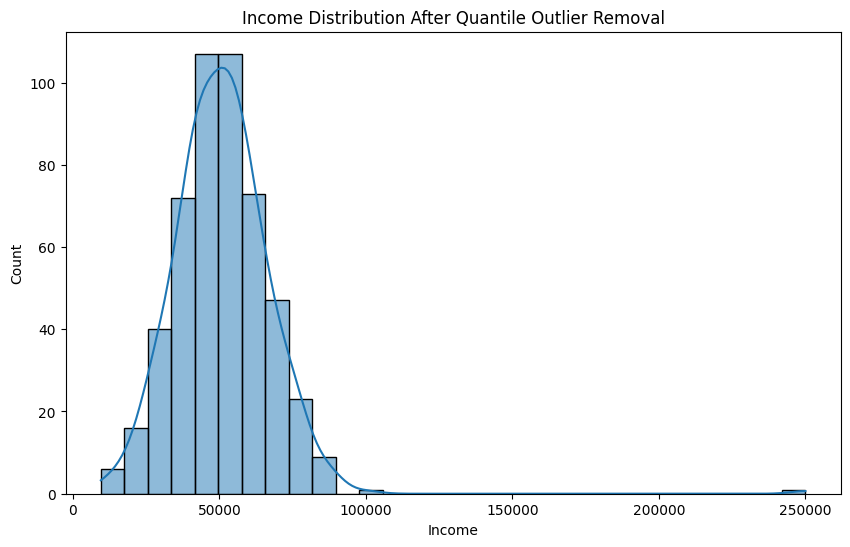

In [7]:
# Visualize the result
plt.figure(figsize=(10, 6))
sns.histplot(df_quantile_cleaned['Income'], kde=True, bins=30)
plt.title('Income Distribution After Quantile Outlier Removal')
plt.show()

--- 
### Step 3: Outlier Removal using the Standard Deviation Method

* This method assumes a normal distribution and identifies outliers as points that lie a certain number of standard deviations away from the mean. 

* We will use a threshold of 3 standard deviations for the `Spending_Score` column.

In [8]:
# Create a copy of the DataFrame
df_std = df.copy()

# Calculate the mean and standard deviation
mean_std = df_std['Spending_Score'].mean()
std_dev = df_std['Spending_Score'].std()

# Calculate the lower and upper limits
lower_limit_std = mean_std - 3 * std_dev
upper_limit_std = mean_std + 3 * std_dev

# Create the cleaned DataFrame
df_std_cleaned = df_std[
    (df_std['Spending_Score'] > lower_limit_std) & (df_std['Spending_Score'] < upper_limit_std)
]

print(f"Original DataFrame Shape: {df.shape}")
print(f"Standard Deviation Cleaned DataFrame Shape: {df_std_cleaned.shape}")

Original DataFrame Shape: (504, 3)
Standard Deviation Cleaned DataFrame Shape: (502, 3)


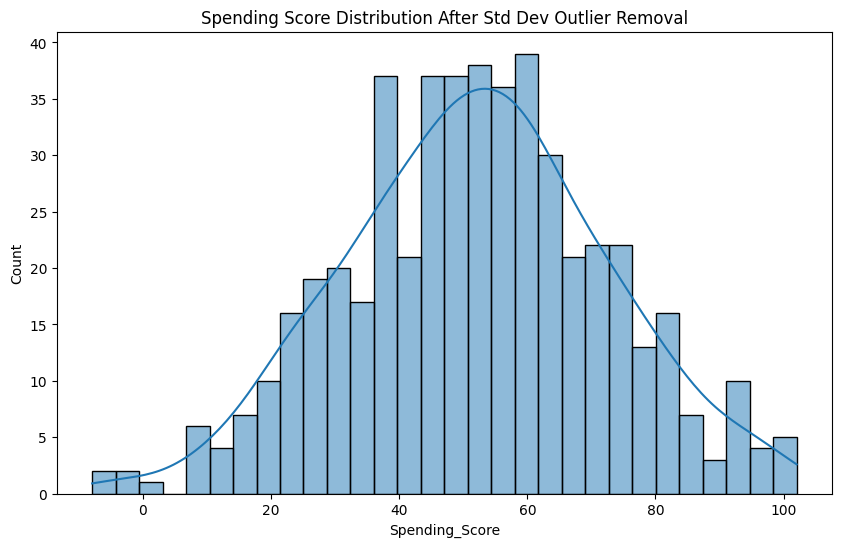

In [9]:
# Visualize the result
plt.figure(figsize=(10, 6))
sns.histplot(df_std_cleaned['Spending_Score'], kde=True, bins=30)
plt.title('Spending Score Distribution After Std Dev Outlier Removal')
plt.show()

--- 
### Step 4: Outlier Removal using the Z-Score Method

* The Z-score method is conceptually identical to the Standard Deviation method. 

* We will manually calculate the Z-score and use a threshold of `|Z| > 3` to remove outliers from the `Age` column, which contains a negative outlier we added earlier.

In [10]:
# Create a copy of the DataFrame
df_zscore = df.copy()

# Manually calculate Z-scores
mean_age = df_zscore['Age'].mean()
std_dev_age = df_zscore['Age'].std()
df_zscore['Age_Zscore'] = (df_zscore['Age'] - mean_age) / std_dev_age

# Find outliers with a Z-score greater than 3 or less than -3
outliers_zscore = df_zscore[(df_zscore['Age_Zscore'] > 3) | (df_zscore['Age_Zscore'] < -3)]
print(f"Number of outliers detected by Z-score: {outliers_zscore.shape[0]}")
print("\nOutlier Rows:")
print(outliers_zscore[['Age', 'Age_Zscore']])

# Create a cleaned DataFrame
df_zscore_cleaned = df_zscore[(df_zscore['Age_Zscore'] > -3) & (df_zscore['Age_Zscore'] < 3)]
print(f"\nShape of original data: {df.shape}")
print(f"Shape of cleaned data (Z-Score Method): {df_zscore_cleaned.shape}")

Number of outliers detected by Z-score: 4

Outlier Rows:
           Age  Age_Zscore
209  73.527315    3.748716
262   2.587327   -3.162369
500  85.000000    4.866403
503 -10.000000   -4.388646

Shape of original data: (504, 3)
Shape of cleaned data (Z-Score Method): (500, 4)


--- 
### Step 5: Outlier Removal using the IQR Method

* The Interquartile Range (IQR) method is a robust technique that uses the quartiles of the data to define outlier boundaries. 

* It is often preferred for skewed data as it is not influenced by extreme values. The formula for the bounds is:

$$
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
$$




* We will apply this method to the `Income` column.

In [12]:
# Create a copy of the DataFrame
df_iqr = df.copy()

# Calculate Q1, Q3, and IQR for Income
Q1_inc = df_iqr['Income'].quantile(0.25)
Q3_inc = df_iqr['Income'].quantile(0.75)
IQR_inc = Q3_inc - Q1_inc

# Calculate the lower and upper limits
low_limit_inc_iqr = Q1_inc - 1.5 * IQR_inc
high_limit_inc_iqr = Q3_inc + 1.5 * IQR_inc

# Create the outlier DataFrame
iqr_outliers = df_iqr[
    (df_iqr['Income'] < low_limit_inc_iqr) | (df_iqr['Income'] > high_limit_inc_iqr)
]

# Print the number of outliers detected
print(f"Number of Income outliers (IQR Method): {iqr_outliers.shape[0]}")

Number of Income outliers (IQR Method): 9


In [13]:
# Create the cleaned DataFrame
df_iqr_cleaned = df_iqr[
    (df_iqr['Income'] > low_limit_inc_iqr) & (df_iqr['Income'] < high_limit_inc_iqr)
]

# Print the number of outliers detected
print(f"Number of Income outliers (IQR Method): {iqr_outliers.shape[0]}")

# Print the shape of the original and cleaned DataFrames
print(f"Shape of original data: {df.shape}")
print(f"Shape of cleaned data (IQR Method): {df_iqr_cleaned.shape}")

Number of Income outliers (IQR Method): 9
Shape of original data: (504, 3)
Shape of cleaned data (IQR Method): (495, 3)


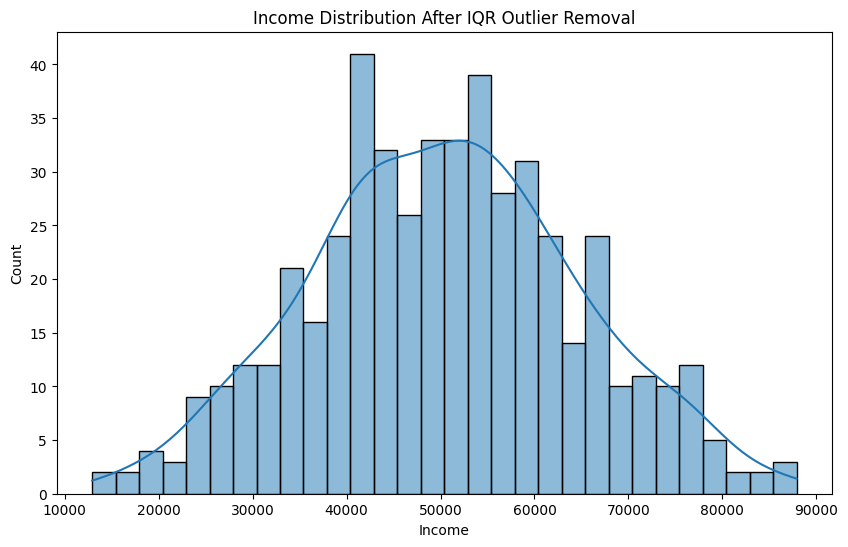

In [14]:
# Visualize the result
plt.figure(figsize=(10, 6))
sns.histplot(df_iqr_cleaned['Income'], kde=True, bins=30)
plt.title('Income Distribution After IQR Outlier Removal')
plt.show()

### Summary

* This notebook has demonstrated four common methods for outlier detection and removal. 

* By applying each method separately on the raw data, we can directly compare their effectiveness. 

* The quantile method provides a broad filter, while the standard deviation and Z-score methods are best for normally distributed data. 

* The IQR method offers a robust alternative that is less sensitive to the data's distribution. 

* The choice of method depends on the nature of your data and the specific requirements of your machine learning task.

---